# Construcción de una rutina Monte Carlo para la simulación del modelo de Ising 2D

Este manual está elaborado con el fin de proporcionar una guía práctica para la elaboración de un programa Monte Carlo para la simulación del modelo de Ising 2D. El programa está construido en **python3**. Es cierto que la complejidad del programa es mínima, pero la eficiencia de los ciclos en python es mínima. Es por ello que cabe resaltar que es recomendable emplear otro lenguaje, como **C++** o **Fortran**, para la implementación del paso Monte Carlo y el algoritmo de Metrópolis.

El sistema que se desea simular es un Ising 2D, cuyo Hamiltoniano consiste únicamente en el término de intercambio

$$\mathcal{H}=-J\sum_{\left\langle i,j\right\rangle }\sigma_{i}\sigma_{j}$$
donde $J$ es la constante de intercambio y $\sigma_{i}$ y $\sigma_{j}$ son los espines de los sitios $i$ y $j$, respectivamente.

Para calcular la magnetización se emplea

$$M=\sum_{i}\sigma_{i}$$
Para el cálculo de la susceptibilidad magnética y el calor específico se sigue
$$\chi	=	\frac{\left(\left\langle M^{2}\right\rangle -\left\langle M\right\rangle ^{2}\right)}{k_{B}T}$$

$$C_{v}	=	\frac{\left(\left\langle E^{2}\right\rangle -\left\langle E\right\rangle ^{2}\right)}{k_{B}T^{2}}$$

## Importación de librerías

In [31]:
#Código hecho por: Juan David Alzate Cardona
#PCM Computational Applications
#Universidad Nacional de Colombia
import numpy
from matplotlib import pyplot
import itertools
%matplotlib inline

- **numpy** se emplea para computación científica. Esta contiene muchas funciones para cálculos numéricos.
- **pyplot** se emplea para las gráficas.
- **itertools** es una librería para construcción de iteradores.
- la sentencia **%matplotlib inline** es por si se está haciendo este tutorial en un ipython notebook, las gráficas de matplotlib sean mostradas dentro de celdas.

## Definición de constantes

In [2]:
length = 10
J = 1.0
kB = 1.0

N = length * length

- **length** es la longitud de nuestro sistema.
- **J** es la constante de intercambio.
- **kB** es la constante de Boltzmann.
- **N** es la cantidad de sitios, la cual es igual a length $\times$ length.

## Creación de arreglos

In [3]:
sites = []
spins = []

- **sites** es una lista donde se almacenarán las parejas $(i, j)$ de los sitios de la red.
- **spins** es una lista donde se almacenarán los espines para cada sitio. De esta forma, **spins** y **sites** tendrán el mismo tamaño y se corresponderán uno a uno.

## Creación de la muestra

Creamos la red cuadrada de lado **length** y agregamos a la lista **sites** las parejas $(i, j)$. Se puede observar que **sites** es una lista donde cada elemento es una tupla que corresponde a un sitio:

In [4]:
sites = list(itertools.product(range(length), range(length)))

Debemos crear la red cuadrada de lado **length** y agregar a la lista **sites** las parejas $(i, j)$ como tuplas. Se puede observar que **sites** es una lista donde cada elemento es una tupla que corresponde a un sitio:

In [5]:
print(sites)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


## Creación de estado aleatorio

La función **random_configuration** recorre todos los sitios y les asigna un valor de 1 o -1 aleatoriamente. Se empleará para darle el estado inicial al sistema a temperatura alta.

In [6]:
def random_configuration():
    return numpy.random.choice([-1, 1], size=len(sites))

Con la función anterior, podemos crear un estado inicial para la lista **spins**:

In [7]:
spins = random_configuration()
print(spins)

[ 1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1  1
  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1 -1 -1  1  1  1 -1  1  1
 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1
 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1
  1 -1 -1  1]


## Función para visualización de los espines

Con el fin de visualizar gráficamente un estado, declaramos una función **plot_spins** tal que grafique en cada sitio una flecha de color <span style="color: red;">rojo</span> si el espín del sitio tiene valor 1 o <span style="color: azul;">azul</span> si tiene valor -1.

In [8]:
def plot_spins():
    pyplot.figure()
    colors = ["crimson" if s == 1 else "royalblue" for s in spins]
    positions = numpy.array(sites)
    x, y = positions.T
    pyplot.quiver(x, y, 0, spins, color=colors, pivot="middle", scale=15, width=0.01, lw=0.5)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.xlim(-0.5, length - 0.5)
    pyplot.ylim(-0.5, length - 0.5)
    pyplot.gca().set_aspect("equal")
    pyplot.grid()
    pyplot.show

La función consiste en recorrer cada pareja $(i, j)$ y en cada punto colocar una flecha de color rojo si el sitio tiene valor 1 o azul si tiene valor -1. Se ejecuta la función **plot_spins** para visualizar el estado del sistema:

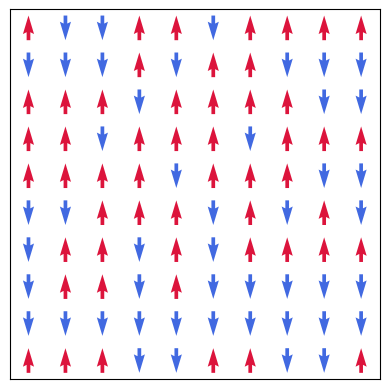

In [9]:
plot_spins()

## Asignación de vecinos

En este punto, debemos calcular los vecinos de cada sitio. Para esto, creamos un diccionario **nbhs** donde las *keys* serán los índices de los sitios y los *values* serán una lista de índices que corresponden a los vecinos de cada sitio. **Recordemos que el sistema tiene condiciones periódicas de frontera**.

In [10]:
nbhs = {}
for i, site in enumerate(sites):
    x, y = site
    nbh1 = sites.index(((x + 1) % length, y))
    nbh2 = sites.index(((x - 1) % length, y))
    nbh3 = sites.index((x, (y + 1) % length))
    nbh4 = sites.index((x, (y - 1) % length))
    nbhs[i] = (nbh1, nbh2, nbh3, nbh4)

En vista de que cada sitio tiene 4 vecinos, el número total de interacciones debe ser igual a $4\times N$. Es por eso que podemos hacer un *assert*:

In [11]:
num_interactions = numpy.sum([len(nbhs[i]) for i in range(N)])
assert(num_interactions == 4*N)

## Creación de funciones para cálculo de energía local, energía total y magnetización

In [12]:
def energy_site(index):
    energy = 0.0
    for nbh in nbhs[index]:
        energy += spins[index] * spins[nbh]
    return -J * energy

def total_energy():
    energy = 0.0
    for index in range(N):
        energy += energy_site(index)
    return 0.5 * energy

def magnetization():
    return numpy.sum(spins)

- La función **energy_site** calcula la energía local del sitio con índice *index*. Debe recibir como argumento un entero que corresponde al índice del sitio $(i, j)$ en la lista **sites**. Recordemos que el Hamiltoniano sólo tiene el término de intercambio.
- La función **total_energy** calcula la energía total del sistema sumando las energías locales de cada sitio. Al final se debe dividir por 2 debido a que las interacciones se cuentan 2 veces.
- La función **magnetization** computa la magnetización total de la red sumando los valores del espín de cada sitio.

Si se imprime la magnetización del sistema, debe ser consecuente con la suma de los espines en la figura:

magnetization =  6


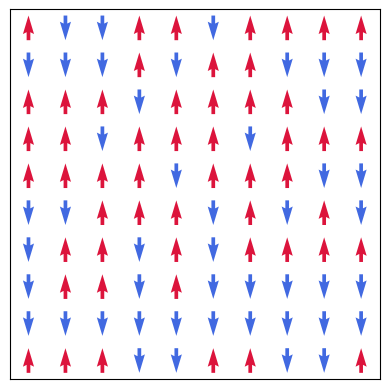

In [13]:
plot_spins()
print("magnetization = ", magnetization())

## Implementación del algoritmo de Metrópolis

In [14]:
def metropolis(index, T):
    oldSpin = spins[index]
    oldEnergy = energy_site(index)
    spins[index] *= -1
    newEnergy = energy_site(index)
    deltaE = newEnergy - oldEnergy
    if deltaE <= 0:
        pass
    else:
        if numpy.random.uniform(0, 1) <= numpy.exp(-deltaE/(kB*T)):
            pass
        else:
            spins[index] *= -1

Para mayor información, se puede consultar el algoritmo de Metrópolis en http://hua-zhou.github.io/teaching/st758-2014fall/top10/metropolis.pdf

## Implementación del paso Monte Carlo

In [15]:
def monte_carlo_step(T):
    for index in range(N):
        index_rand_site = numpy.random.randint(0, N)
        metropolis(index_rand_site, T)

Un paso Monte Carlo consiste en recorrer la cantidad de sitios que tenga la red aleatoriamente y en cada elección aplicar el algoritmo de Metrópolis.

# Simulación

## Definición de parámetros

In [24]:
mcs = 1000
high_T = 5.0
low_T = 0.01
step = -0.1
assert (high_T >= low_T)

Se definen los parámetros de la simulación. Entre ellos está la cantidad de pasos Monte Carlo **mcs**, la temperatura inicial **high_T** y la temperatura final **low_T**. Recordemos que $T_{\rm high} \geq T_{\rm low}$. A su vez, se define el paso entre temperaturas **step**.

## Ciclo de temperatura

Se crea el arreglo de temperaturas con los valores establecidos anteriormente. Se aloja espacio para almacenar la energía del sistema y la magnetización. Se recorre las temperaturas y los pasos Monte Carlo. En cada paso de temperatura y en cada paso Monte Carlo se almacena la energía total y la magnetización del sistema. Los arreglos **energies** y **magnetizations** se emplearán para calcular los promedios estadísticos.

In [25]:
%%time
temps = numpy.arange(high_T, low_T, step)
energies = numpy.zeros(shape=(len(temps), mcs))
magnetizations = numpy.zeros(shape=(len(temps), mcs))
random_configuration()
for T_index, T in enumerate(temps):
    print("computing T = %.5f ..." % T)
    for i in range(mcs):
        monte_carlo_step(T)
        energies[T_index, i] = total_energy()
        magnetizations[T_index, i] = magnetization()


computing T = 5.00000 ...
computing T = 4.90000 ...
computing T = 4.80000 ...
computing T = 4.70000 ...
computing T = 4.60000 ...
computing T = 4.50000 ...
computing T = 4.40000 ...
computing T = 4.30000 ...
computing T = 4.20000 ...
computing T = 4.10000 ...
computing T = 4.00000 ...
computing T = 3.90000 ...
computing T = 3.80000 ...
computing T = 3.70000 ...
computing T = 3.60000 ...
computing T = 3.50000 ...
computing T = 3.40000 ...
computing T = 3.30000 ...
computing T = 3.20000 ...
computing T = 3.10000 ...
computing T = 3.00000 ...
computing T = 2.90000 ...
computing T = 2.80000 ...
computing T = 2.70000 ...
computing T = 2.60000 ...
computing T = 2.50000 ...
computing T = 2.40000 ...
computing T = 2.30000 ...
computing T = 2.20000 ...
computing T = 2.10000 ...
computing T = 2.00000 ...
computing T = 1.90000 ...
computing T = 1.80000 ...
computing T = 1.70000 ...
computing T = 1.60000 ...
computing T = 1.50000 ...
computing T = 1.40000 ...
computing T = 1.30000 ...
computing T 

Una simulación con 10000 pasos Monte Carlo, length = 10, desde $T_{\rm high}=5.0$ hasta $T_{\rm low}=0.01$ con una paso de $\Delta T = -0.1$ en un computador con Intel® Core™ i7-3612QM CPU @ 2.10GHz tardó 28min 47s.

Es posible observar el estado final de la muestra a la última temperatura:

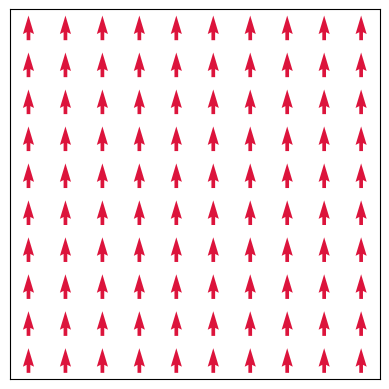

In [26]:
plot_spins()

# Graficación

## Cálculo de promedios

Se rechaza la mitad de pasos Monte Carlo para la relajación. La otra mitad se promedia.

In [27]:
tau = mcs // 2
energy_mean = numpy.mean(energies[:, tau:], axis=1)
magnetization_mean = numpy.mean(numpy.abs(magnetizations[:, tau:]), axis=1)

## Gráficas para la energía total y la magnetización en función de la temperatura

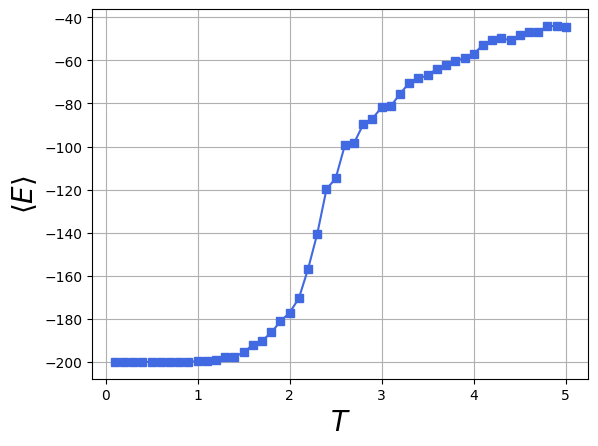

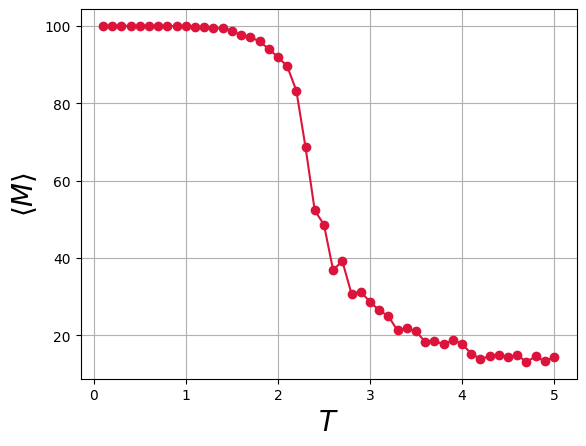

In [28]:
pyplot.figure()
pyplot.plot(temps, energy_mean, "-s", color="royalblue")
pyplot.xlabel(r"$T$", fontsize=20)
pyplot.ylabel(r"$\left<E\right>$", fontsize=20)
pyplot.grid()
pyplot.show()

pyplot.figure()
pyplot.plot(temps, magnetization_mean, "-o", color="crimson")
pyplot.xlabel(r"$T$", fontsize=20)
pyplot.ylabel(r"$\left<M\right>$", fontsize=20)
pyplot.grid()
pyplot.show()

## Cálculo de la susceptibilidad magnética

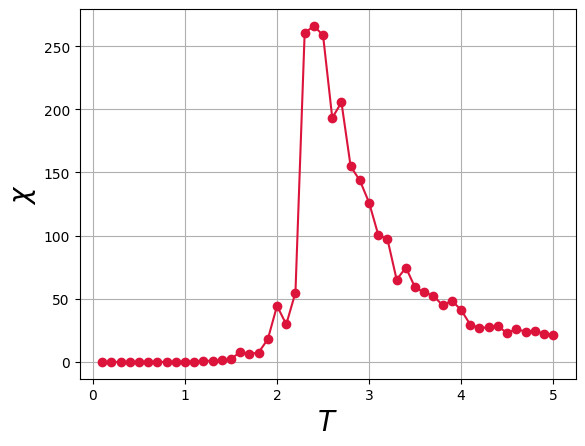

In [29]:
magnetization_std = numpy.std(numpy.abs(magnetizations[:, tau:]), axis=1)
susceptibility = magnetization_std ** 2 / (kB * temps)

pyplot.figure()
pyplot.plot(temps, susceptibility, "-o", color="crimson")
pyplot.xlabel(r"$T$", fontsize=20)
pyplot.ylabel(r"$\chi$", fontsize=20)
pyplot.grid()
pyplot.show()

## Cálculo del calor específico

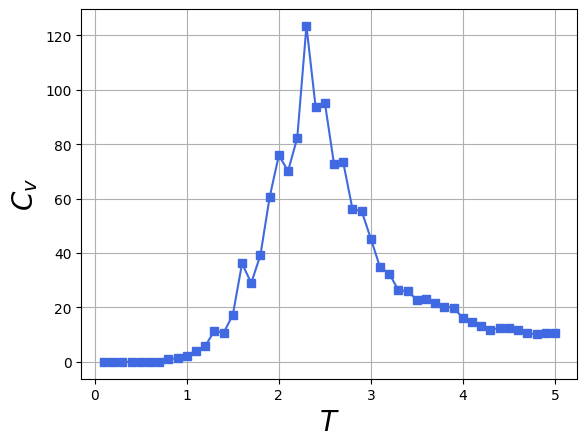

In [30]:
energy_std = numpy.std(energies[:, tau:], axis=1)
specific_heat = energy_std ** 2 / (kB * temps * temps)

pyplot.figure()
pyplot.plot(temps, specific_heat, "-s", color="royalblue")
pyplot.xlabel(r"$T$", fontsize=20)
pyplot.ylabel(r"$C_v$", fontsize=20)
pyplot.grid()
pyplot.show()